c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Perceptron Performance Metrics:
Accuracy: 0.7111
Precision: 0.5000
Recall: 0.6667
F1 Score: 0.5556


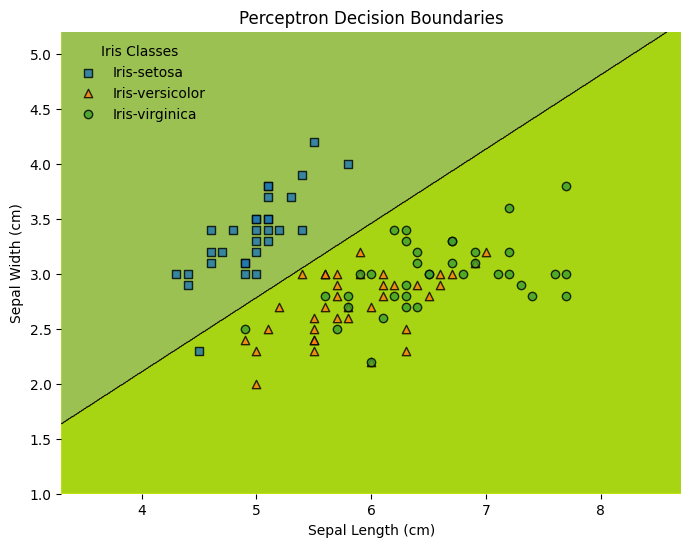

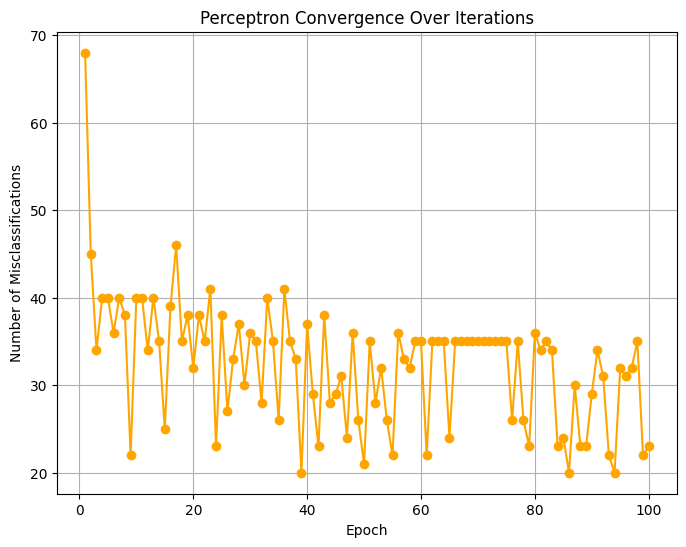

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from mlxtend.plotting import plot_decision_regions

# Load the Iris dataset
df = pd.read_csv('../iris.csv')

# Extract features and target
X = df[['SepalLengthCm', 'SepalWidthCm']].values
y = df['Species'].factorize()[0]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a perceptron classifier
perceptron = Perceptron(max_iter=1000, tol=1e-3, random_state=42)
perceptron.fit(X_train, y_train)

# Evaluate the model
y_pred = perceptron.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Perceptron Performance Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Visualize the decision boundaries
perceptron_2d = Perceptron(max_iter=1000, tol=1e-3, random_state=42)
perceptron_2d.fit(X_train, y_train)

plt.figure(figsize=(8, 6))
colors = ['red', 'blue', 'green']  # Custom colors for each class
plot_decision_regions(X_train, y_train, clf=perceptron_2d, legend=2)
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Perceptron Decision Boundaries')

# Custom legend for class names
handles, labels = plt.gca().get_legend_handles_labels()
class_labels = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
plt.legend(handles, class_labels, title="Iris Classes", loc="upper left", frameon=False)

# Change color of the decision boundaries plot
plt.gca().patch.set_facecolor('yellow')  # Set background color of the plot
plt.show()

# Plot the convergence of the perceptron learning algorithm
perceptron_convergence = Perceptron(max_iter=1, tol=None, warm_start=True, random_state=42)

n_epochs = 100
errors = []

for _ in range(n_epochs):
    perceptron_convergence.fit(X_train, y_train)
    y_pred_train = perceptron_convergence.predict(X_train)
    errors.append(np.sum(y_train != y_pred_train))

plt.figure(figsize=(8, 6))
plt.plot(range(1, n_epochs + 1), errors, marker='o', color='orange')  # Change color of the convergence plot
plt.xlabel('Epoch')
plt.ylabel('Number of Misclassifications')
plt.title('Perceptron Convergence Over Iterations')
plt.grid(True)
plt.show()
